# LOAD LIBRARIES

In [4]:
import mlflow
import mlflow.xgboost
import xgboost as xgb

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import pandas as pd
import os

# SETTINGS

In [5]:
mlflow_arn = "arn:aws:sagemaker:eu-west-1:575618486322:mlflow-tracking-server/dev-mlflow"
mlflow_experiment_name = "02-sample-experiment"

# SET MLFLOW

In [6]:
mlflow.set_tracking_uri(mlflow_arn)
mlflow.set_experiment(mlflow_experiment_name)

2024/10/30 10:47:39 INFO mlflow.tracking.fluent: Experiment with name '02-sample-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://ipf-sds-datalake-dev-data-science-bucket/mlflow/2', creation_time=1730285259326, experiment_id='2', last_update_time=1730285259326, lifecycle_stage='active', name='02-sample-experiment', tags={}>

# LOAD DATA

In [7]:
# Load Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# BUILD A MODEL

In [8]:
# Create and train model
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# SAVE A CHART

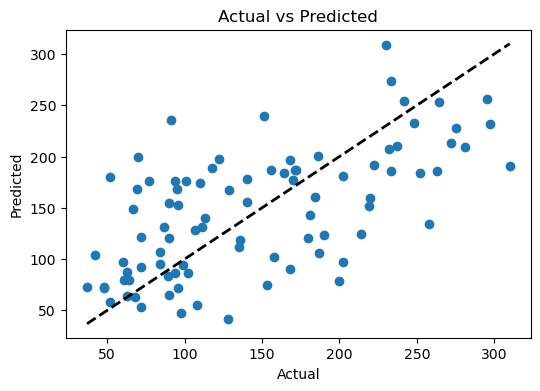

In [12]:
# Create and log residuals plot as an artifact
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
residuals_plot_file = "residuals_plot.png"
plt.savefig(residuals_plot_file)

In [13]:
# Start a new MLflow run
with mlflow.start_run() as run:
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

    # Log parameters directly from the model
    params = model.get_params()
    for param, value in params.items():
        mlflow.log_param(param, value)

    # Log metrics
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    mlflow.set_tag("model_type", "xgboost")

    # Log the model
    mlflow.xgboost.log_model(model, "mymodel")

    # Log residuals plot as an artifact
    mlflow.log_artifact(residuals_plot_file)

    # Log a sample input
    sample_input = X_test[0]
    input_df = pd.DataFrame([sample_input], columns=data.feature_names)
    input_file = "sample_input.csv"
    input_df.to_csv(input_file, index=False)
    mlflow.log_artifact(input_file)

    # Remove temporary files
    os.remove(residuals_plot_file)
    os.remove(input_file)

print("Logging completed.")

Run ID: 8195ec1a094349afb580725eddfe47eb


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:50:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1713397725960/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
2024/10/30 10:50:21 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/10/30 10:50:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run overjoyed-doe-579 at: https://eu-west-1.experiments.sagemaker.aws/#/experiments/2/runs/8195ec1a094349afb580725eddfe47eb.
2024/10/30 10:50:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://eu-west-1.experiments.sagemaker.aws/#/experiments/2.


Logging completed.


# BUILD ONE MORE MODEL WITH CUSTOM NAME

Run ID: 97eac6e056ee4f5c9fc5453bb4bbe134


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:42:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1713397725960/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.11/site-packages/_distutils_hack/__init__.py:17: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support fo

Logging completed.


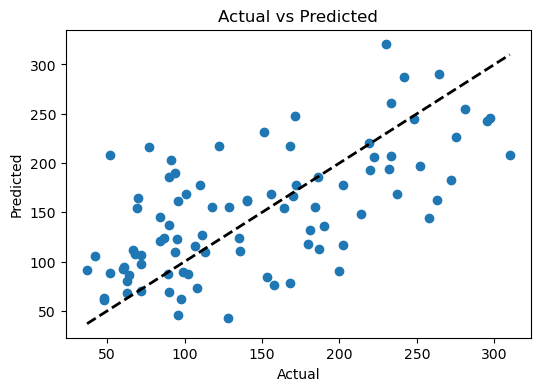

In [17]:
# Create and train model
model = xgb.XGBRegressor(n_estimators=100, max_depth=2, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create and log residuals plot as an artifact
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
residuals_plot_file = "residuals_plot.png"
plt.savefig(residuals_plot_file)

# Start a new MLflow run
with mlflow.start_run(run_name = "my-custom-name") as run:
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

    # Log parameters directly from the model
    params = model.get_params()
    for param, value in params.items():
        mlflow.log_param(param, value)

    mlflow.set_tag("model_type", "xgboost")

    # Log metrics as a dictionary
    mlflow.log_metrics({'mse': mse,
                        'r2': r2})

    # Log the model
    mlflow.xgboost.log_model(model, "model")

    # Log residuals plot as an artifact
    mlflow.log_artifact(residuals_plot_file)

    # Log a sample input
    sample_input = X_test[0]
    input_df = pd.DataFrame([sample_input], columns=data.feature_names)
    input_file = "sample_input.csv"
    input_df.to_csv(input_file, index=False)
    mlflow.log_artifact(input_file, artifact_path = "DATA")

    # Remove temporary files
    os.remove(residuals_plot_file)
    os.remove(input_file)

print("Logging completed.")

# MANUAL START AND END

In [16]:
run = mlflow.start_run(run_name="manual_run_lifecycle")
print(f"Started run with ID: {run.info.run_id}")
    
run_id = run.info.run_id
print(f"Run ID: {run_id}")

# Log parameters directly from the model
params = model.get_params()
for param, value in params.items():
    mlflow.log_param(param, value)

mlflow.set_tag("model_type", "xgboost")

# Log metrics as a dictionary
mlflow.log_metrics({'mse': mse,
                    'r2': r2})

# Log the model
mlflow.xgboost.log_model(model, "model")

mlflow.end_run()

Started run with ID: 70866bbc79584a709fc522af906313bf
Run ID: 70866bbc79584a709fc522af906313bf


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:40:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1713397725960/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
2024/10/30 11:40:50 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/10/30 11:40:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run manual_run_lifecycle at: https://eu-west-1.experiments.sagemaker.aws/#/experiments/2/runs/70866bbc79584a709fc522af906313bf.
2024/10/30 11:40:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://eu-west-1.experiments.sagemaker.aws/#/experiments/2.
